In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# *Loading Dataset*

In [ ]:
df = pd.read_csv(r"C:\First Quadrant Labs Projects\Osteoporosis\osteoporosis.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Id                   1958 non-null   int64 
 1   Age                  1958 non-null   int64 
 2   Gender               1958 non-null   object
 3   Hormonal Changes     1958 non-null   object
 4   Family History       1958 non-null   object
 5   Race/Ethnicity       1958 non-null   object
 6   Body Weight          1958 non-null   object
 7   Calcium Intake       1958 non-null   object
 8   Vitamin D Intake     1958 non-null   object
 9   Physical Activity    1958 non-null   object
 10  Smoking              1958 non-null   object
 11  Alcohol Consumption  970 non-null    object
 12  Medical Conditions   1311 non-null   object
 13  Medications          973 non-null    object
 14  Prior Fractures      1958 non-null   object
 15  Osteoporosis         1958 non-null   int64 
dtypes: int

In [ ]:
df.shape

(1958, 16)

In [ ]:
df.columns.tolist()

['Id',
 'Age',
 'Gender',
 'Hormonal Changes',
 'Family History',
 'Race/Ethnicity',
 'Body Weight',
 'Calcium Intake',
 'Vitamin D Intake',
 'Physical Activity',
 'Smoking',
 'Alcohol Consumption',
 'Medical Conditions',
 'Medications',
 'Prior Fractures',
 'Osteoporosis']

In [ ]:
df.dtypes

Id                      int64
Age                     int64
Gender                 object
Hormonal Changes       object
Family History         object
Race/Ethnicity         object
Body Weight            object
Calcium Intake         object
Vitamin D Intake       object
Physical Activity      object
Smoking                object
Alcohol Consumption    object
Medical Conditions     object
Medications            object
Prior Fractures        object
Osteoporosis            int64
dtype: object

In [ ]:
df.isnull().sum()

Id                       0
Age                      0
Gender                   0
Hormonal Changes         0
Family History           0
Race/Ethnicity           0
Body Weight              0
Calcium Intake           0
Vitamin D Intake         0
Physical Activity        0
Smoking                  0
Alcohol Consumption    988
Medical Conditions     647
Medications            985
Prior Fractures          0
Osteoporosis             0
dtype: int64

**Columns Alcohol Consumption (988 missing), Medical Conditions (647 missing), and Medications (985 missing) have significant missing values.**

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe(include= "all")

,Id,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
count,1958.000000,1958.000000,1958,1958,1958,1958,1958,1958,1958,1958,1958,970,1311,973,1958,1958.000000
unique,NaN,NaN,2,2,2,3,2,2,2,2,2,1,2,1,2,NaN
top,NaN,NaN,Male,Normal,No,African American,Normal,Low,Sufficient,Active,Yes,Moderate,Hyperthyroidism,Corticosteroids,Yes,NaN
freq,NaN,NaN,992,981,998,681,1027,1004,1011,1021,982,970,678,973,983,NaN
mean,105515.320735,39.101124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000
std,2589.407806,21.355424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500128
min,101008.000000,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,103348.500000,21.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,105469.000000,32.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000
75%,107755.000000,53.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000


1. Categorical Data:
    - Gender: 992 Male, 966 Female.
    - Hormonal Changes: Most are "Normal" (981).
    - Family History: Majority have "No" family history (998).
    - Race/Ethnicity: The most common is "African American" (681).
    - Smoking: Most individuals are "Non-smokers" (982).
    - Osteoporosis: 50% of the individuals have osteoporosis.

2. Numerical Data:
    - Age: Ranges from 18 to 90, with a mean age of 39.

3. Target Variable (Osteoporosis):
    - The target variable "Osteoporosis" is balanced, with equal distribution (50% have osteoporosis).

## **EDA**

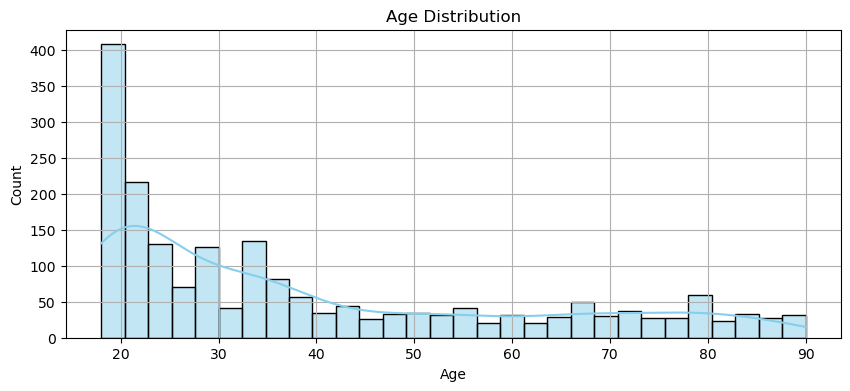

In [ ]:
# Plot age distribution
plt.figure(figsize=(10, 4))
sns.histplot(df['Age'], kde=True, bins=30, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(True)
plt.show()

- Insights from the Plot:
    - Highly right-skewed distribution: Most individuals are between 18–30 years old.

    - There's a steep drop after 30, with relatively fewer older individuals.

    - However, there’s a significant spread across all age groups up to 90.

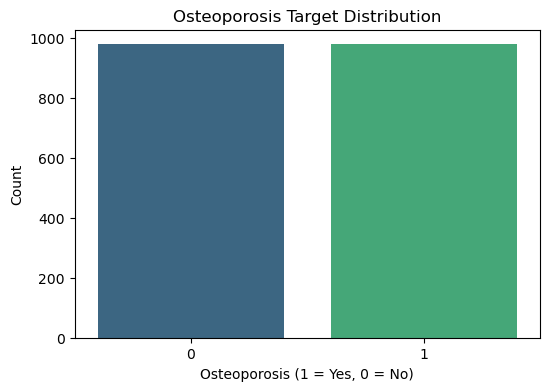

In [ ]:
# Plot target variable distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Osteoporosis', hue='Osteoporosis', data=df, palette='viridis', legend=False)
plt.title('Osteoporosis Target Distribution')
plt.xlabel('Osteoporosis (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()

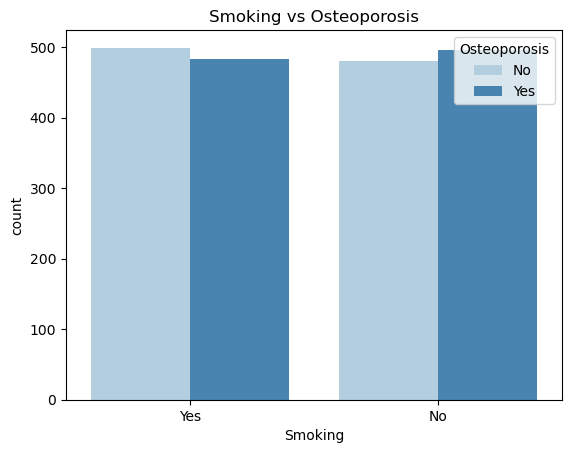

In [ ]:
# Smoking Vs Osteoporosis
sns.countplot(x='Smoking', hue='Osteoporosis', data=df, palette='Blues')
plt.title('Smoking vs Osteoporosis')
plt.legend(title='Osteoporosis', labels=['No', 'Yes'])
plt.show()

- From your chart, it appears that:

    - The proportion of people with and without osteoporosis is quite similar for both smokers and non-smokers.

    - The bars are almost equal in height, suggesting smoking might not have a strong direct influence on osteoporosis in this dataset.

    - Both groups (Yes and No for smoking) have a fairly even split between Osteoporosis = 1 (Yes) and 0 (No).

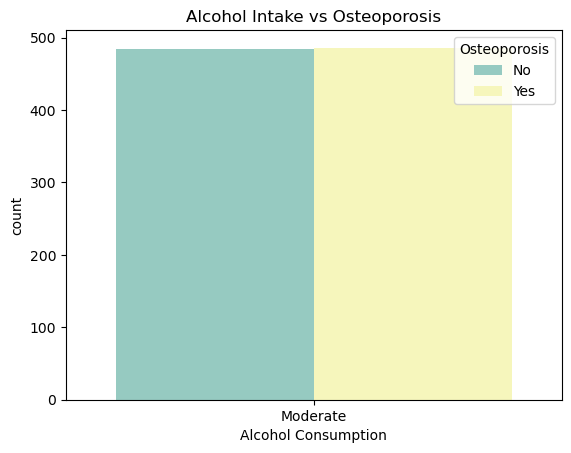

In [ ]:
#Alcohol Intake vs Osteoporosis
sns.countplot(x='Alcohol Consumption', hue='Osteoporosis', data=df, palette='Set3')
plt.title('Alcohol Intake vs Osteoporosis')
plt.legend(title='Osteoporosis', labels=['No', 'Yes'])
plt.show()

- From your chart:

    - All data seems to fall under a single category

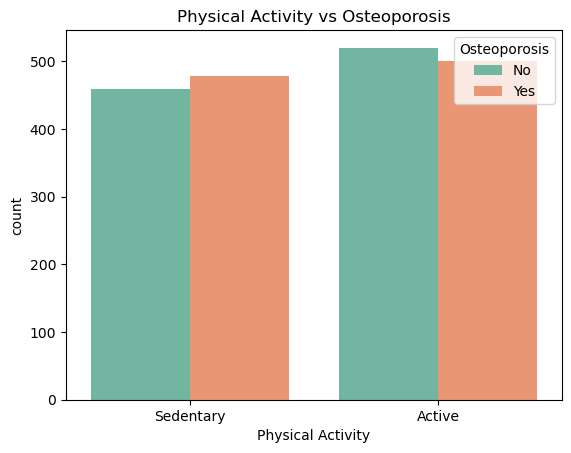

In [ ]:
# Physical Activity vs Osteoporosis
sns.countplot(x='Physical Activity', hue='Osteoporosis', data=df, palette='Set2')
plt.title('Physical Activity vs Osteoporosis')
plt.legend(title='Osteoporosis', labels=['No', 'Yes'])
plt.show()


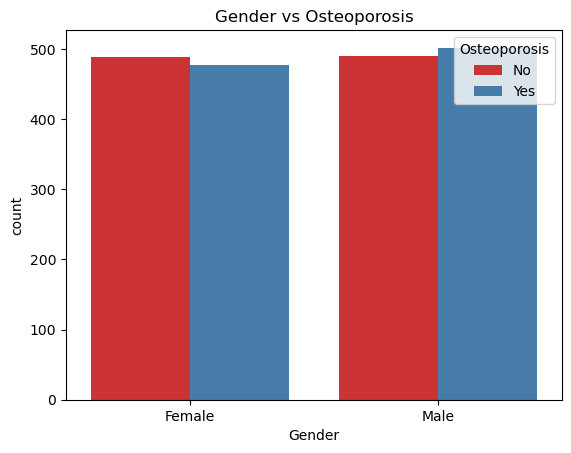

In [ ]:
#  Gender vs Osteoporosis
sns.countplot(x='Gender', hue='Osteoporosis', data=df, palette='Set1')
plt.title('Gender vs Osteoporosis')
plt.legend(title='Osteoporosis', labels=['No', 'Yes'])
plt.show()

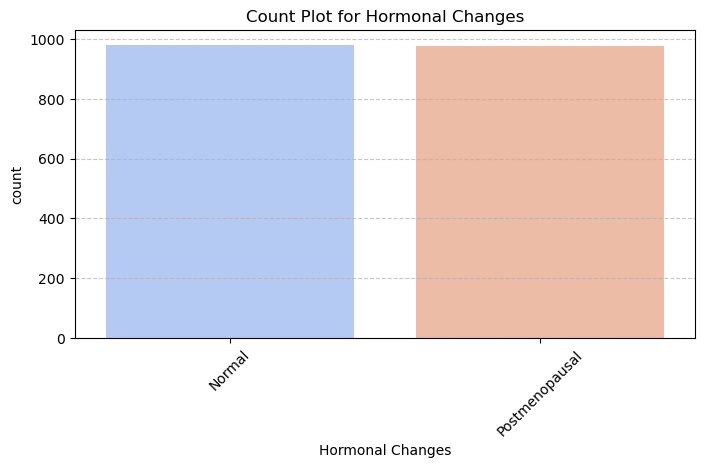

In [ ]:
# Count Plot for Hormonal Changes
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x="Hormonal Changes", hue="Hormonal Changes", palette="coolwarm", legend=False)
plt.title("Count Plot for Hormonal Changes")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

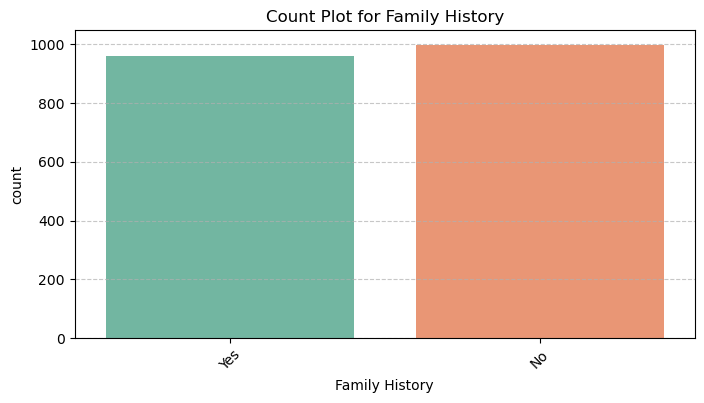

In [ ]:
# Count Plot for Family History
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x="Family History", hue = 'Family History',palette='Set2',legend=False)
plt.title("Count Plot for Family History")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

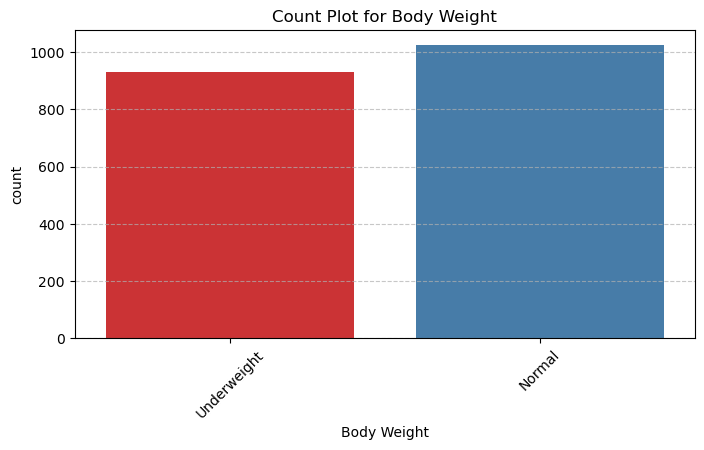

In [ ]:
# Count Plot for Body Weight
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x="Body Weight",hue = "Body Weight",legend = False, palette="Set1")
plt.title("Count Plot for Body Weight")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

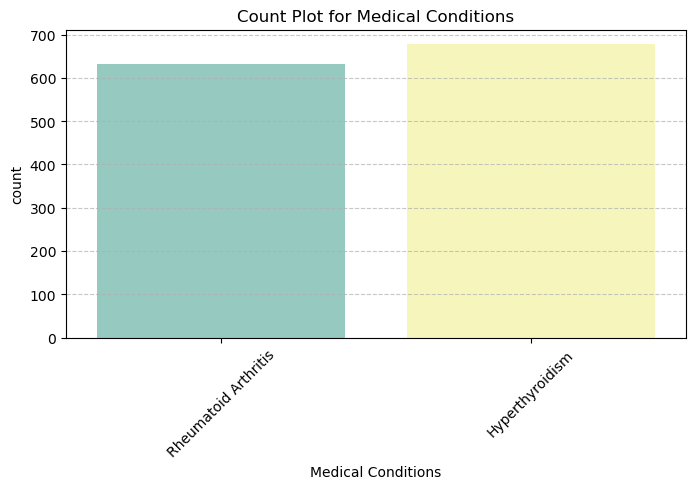

In [ ]:
# Count Plot for Medical Conditions
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x="Medical Conditions",hue = "Medical Conditions",legend = False, palette="Set3")
plt.title("Count Plot for Medical Conditions")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

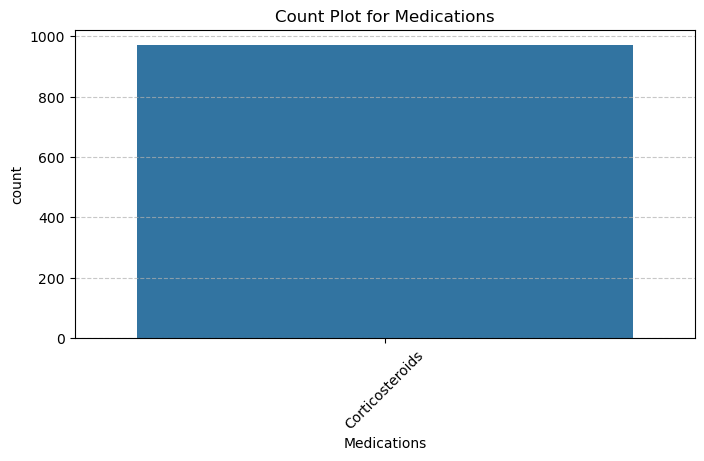

In [ ]:
# Count Plot for Medications
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x="Medications")
plt.title("Count Plot for Medications")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

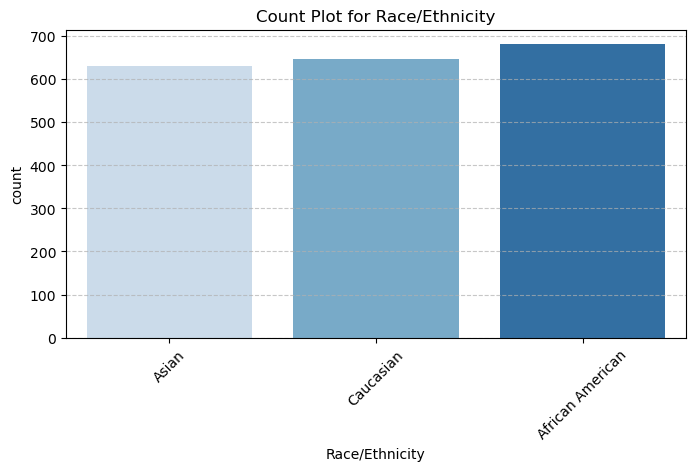

In [ ]:
# Count Plot for Race/Ethnicity
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x="Race/Ethnicity", hue = "Race/Ethnicity", legend = False, palette="Blues")
plt.title("Count Plot for Race/Ethnicity")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

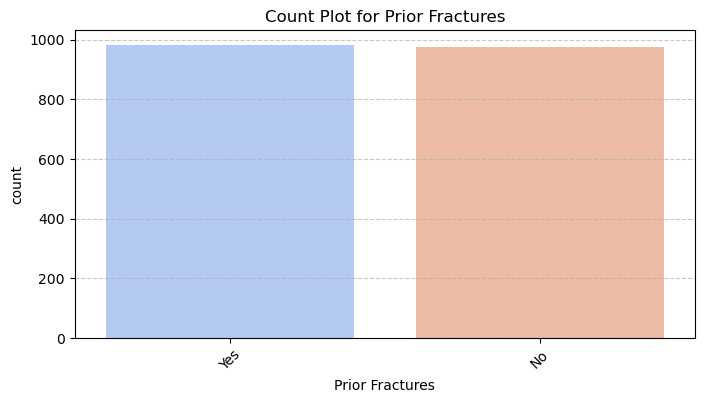

In [ ]:
# Count Plot for Prior Fractures
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x="Prior Fractures",hue = "Prior Fractures",legend = False, palette="coolwarm")
plt.title("Count Plot for Prior Fractures")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

**Handle Missing Values**

In [ ]:
# Fill missing categorical values with mode (most frequent value)
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if df[col].dtype == "object":  # Ensure only categorical columns are processed
        df[col].fillna(df[col].mode()[0])

# Fill missing numerical values with median
numerical_cols = df.select_dtypes(include =["int64", "float64"] ).columns
for col in numerical_cols:
    if df[col].dtype in ["int64", "float64"]:  # Ensure only numerical columns are processed
        df[col].fillna(df[col].median())

# Verify missing values are handled
print("Missing Values after Imputation:\n", df.isnull().sum())

Missing Values after Imputation:
 Id                       0
Age                      0
Gender                   0
Hormonal Changes         0
Family History           0
Race/Ethnicity           0
Body Weight              0
Calcium Intake           0
Vitamin D Intake         0
Physical Activity        0
Smoking                  0
Alcohol Consumption    988
Medical Conditions     647
Medications            985
Prior Fractures          0
Osteoporosis             0
dtype: int64


**Label Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Define categorical columns
categorical_columns = [
    'Gender', 'Hormonal Changes', 'Family History', 'Race/Ethnicity',
    'Body Weight', 'Calcium Intake', 'Vitamin D Intake', 'Physical Activity',
    'Smoking', 'Alcohol Consumption', 'Medical Conditions', 'Medications',
    'Prior Fractures'
]

# Apply LabelEncoder to each categorical column
for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

# print the first few rows to verify the encoding
print(df.head())

       Id  Age  Gender  Hormonal Changes  Family History  Race/Ethnicity  \
0  104866   69       0                 0               1               1   
1  101999   32       0                 0               1               1   
2  106567   89       0                 1               0               2   
3  102316   78       0                 0               0               2   
4  101944   38       1                 1               1               0   

   Body Weight  Calcium Intake  Vitamin D Intake  Physical Activity  Smoking  \
0            1               1                 1                  1        1   
1            1               1                 1                  1        0   
2            0               0                 1                  0        0   
3            1               0                 0                  1        1   
4            0               1                 1                  0        1   

   Alcohol Consumption  Medical Conditions  Medications  Prior

**Feature Engineering**

In [ ]:
# Assuming df is the label-encoded osteoporosis dataset
# Create new and improved features
df['Postmenopausal_Female'] = ((df['Gender'] == 0) & (df['Hormonal Changes'] == 1)).astype(int)
df['Nutrient_Score'] = df['Calcium Intake'] + df['Vitamin D Intake']
df['Underweight_Sedentary'] = ((df['Body Weight'] == 0) & (df['Physical Activity'] == 0)).astype(int)
df['Age_Group_Risk'] = pd.cut(df['Age'], bins=[0, 49, 69, 100], labels=[0, 1, 2], include_lowest=True).astype(int)
df['Nutrient_Deficiency'] = ((df['Calcium Intake'] == 0) & (df['Vitamin D Intake'] == 0)).astype(int)
df['High_Risk_Lifestyle'] = 2 * df['Smoking'] + (1 - df['Physical Activity']) + df['Alcohol Consumption']
df['Medical_Medication_Interaction'] = ((df['Medical Conditions'] != 0) & (df['Medications'] != 0)).astype(int)
df['Fracture_Risk_Profile'] = df['Prior Fractures'] + df['Family History']
df['Postmenopausal_Age_Interaction'] = ((df['Postmenopausal_Female'] == 1) & (df['Age'] >= 50)).astype(int)
df['Underweight_Nutrient_Risk'] = ((df['Body Weight'] == 0) & (df['Nutrient_Score'] <= 1)).astype(int)

# Display the first few rows to verify
print(df.head())

       Id  Age  Gender  Hormonal Changes  Family History  Race/Ethnicity  \
0  104866   69       0                 0               1               1   
1  101999   32       0                 0               1               1   
2  106567   89       0                 1               0               2   
3  102316   78       0                 0               0               2   
4  101944   38       1                 1               1               0   

   Body Weight  Calcium Intake  Vitamin D Intake  Physical Activity  ...  \
0            1               1                 1                  1  ...   
1            1               1                 1                  1  ...   
2            0               0                 1                  0  ...   
3            1               0                 0                  1  ...   
4            0               1                 1                  0  ...   

   Postmenopausal_Female  Nutrient_Score  Underweight_Sedentary  \
0                  

# Model Selection and Evaluation


In [ ]:
# Split data
X = df.drop(columns=['Id','Osteoporosis'],axis=1)
y = df['Osteoporosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Logistic Regression
Accuracy: 0.809
Precision: 0.833
Recall: 0.779
F1 Score: 0.805
ROC AUC: 0.892


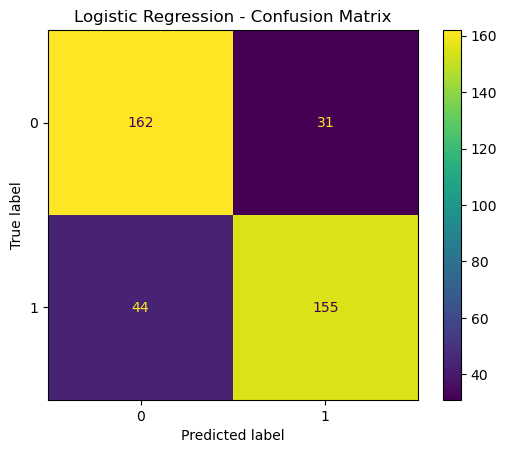

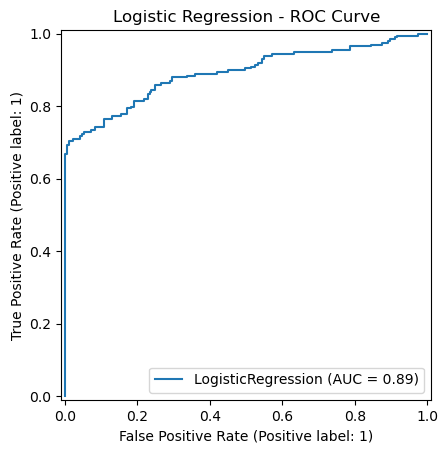

In [ ]:
# 1. Logistic Regression

# Define the model
logreg = LogisticRegression(max_iter=1000)

# Train the model
logreg.fit(X_train, y_train)

# Predict
y_pred_log = logreg.predict(X_test)
y_prob_log = logreg.predict_proba(X_test)[:, 1]

# Evaluate
print("Logistic Regression")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log):.3f}")
print(f"Precision: {precision_score(y_test, y_pred_log):.3f}")
print(f"Recall: {recall_score(y_test, y_pred_log):.3f}")
print(f"F1 Score: {f1_score(y_test, y_pred_log):.3f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_prob_log):.3f}")

# Confusion Matrix
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_log)).plot()
plt.title("Logistic Regression - Confusion Matrix")
plt.show()

# ROC Curve
RocCurveDisplay.from_estimator(logreg, X_test, y_test)
plt.title("Logistic Regression - ROC Curve")
plt.show()

Decision Tree Classifier
Accuracy: 0.824
Precision: 0.819
Recall: 0.839
F1 Score: 0.829
ROC AUC: 0.824


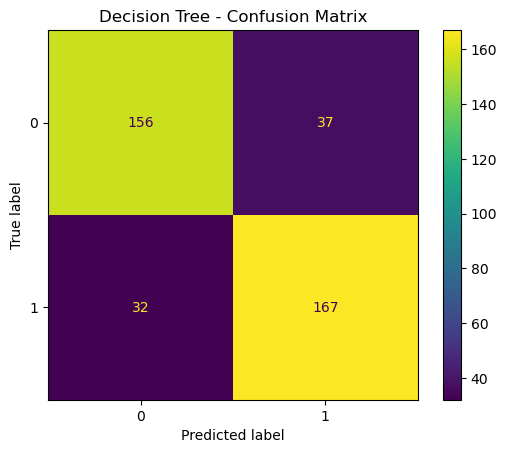

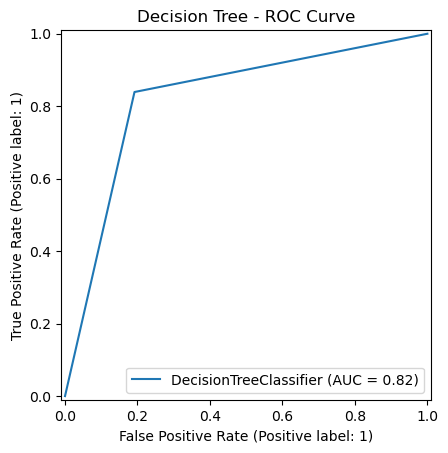

In [ ]:
# 2. Decision Tree Classifier

# Define the model
dtree = DecisionTreeClassifier()

# Train the model
dtree.fit(X_train, y_train)

# Predict
y_pred_tree = dtree.predict(X_test)
y_prob_tree = dtree.predict_proba(X_test)[:, 1]

# Evaluate
print("Decision Tree Classifier")
print(f"Accuracy: {accuracy_score(y_test, y_pred_tree):.3f}")
print(f"Precision: {precision_score(y_test, y_pred_tree):.3f}")
print(f"Recall: {recall_score(y_test, y_pred_tree):.3f}")
print(f"F1 Score: {f1_score(y_test, y_pred_tree):.3f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_prob_tree):.3f}")

# Confusion Matrix
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_tree)).plot()
plt.title("Decision Tree - Confusion Matrix")
plt.show()

# ROC Curve
RocCurveDisplay.from_estimator(dtree, X_test, y_test)
plt.title("Decision Tree - ROC Curve")
plt.show()

Random Forest Classifier
Accuracy: 0.849
Precision: 0.955
Recall: 0.739
F1 Score: 0.833
ROC AUC: 0.887


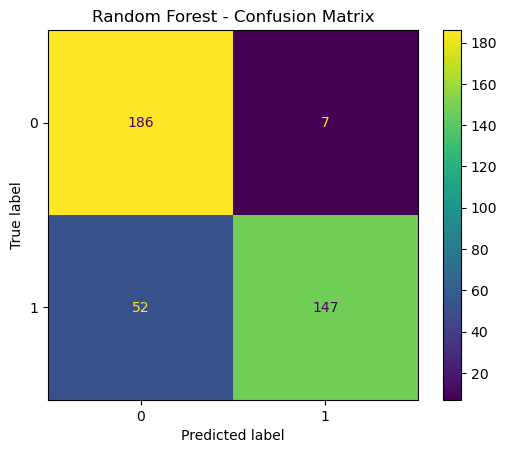

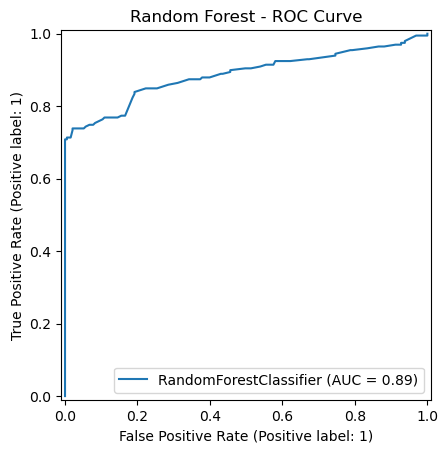

In [ ]:
#  3. Random Forest Classifier

# Define the model
rforest = RandomForestClassifier()

# Train the model
rforest.fit(X_train, y_train)

# Predict
y_pred_rf = rforest.predict(X_test)
y_prob_rf = rforest.predict_proba(X_test)[:, 1]

# Evaluate
print("Random Forest Classifier")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.3f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.3f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.3f}")
print(f"F1 Score: {f1_score(y_test, y_pred_rf):.3f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_prob_rf):.3f}")

# Confusion Matrix
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_rf)).plot()
plt.title("Random Forest - Confusion Matrix")
plt.show()

# ROC Curve
RocCurveDisplay.from_estimator(rforest, X_test, y_test)
plt.title("Random Forest - ROC Curve")
plt.show()

Support Vector Classifier
Accuracy: 0.842
Precision: 0.966
Recall: 0.714
F1 Score: 0.821
ROC AUC: 0.890


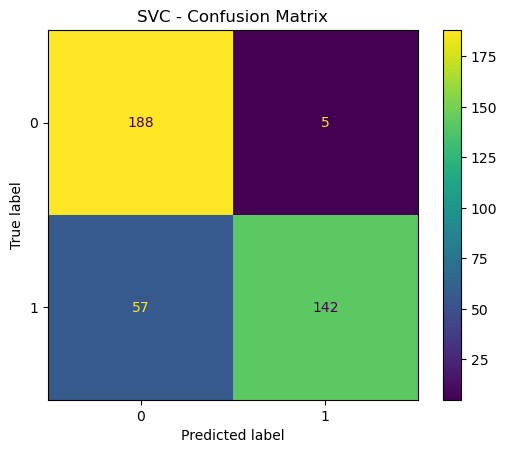

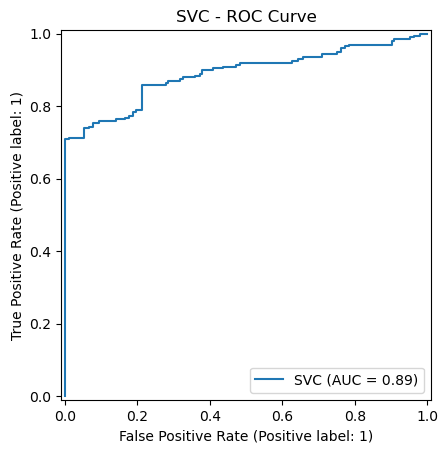

In [ ]:
# 4. Support Vector Classifier (SVC)

# Define the model
svc = SVC(probability=True)
# Train the model
svc.fit(X_train, y_train)

# Predict
y_pred_svc = svc.predict(X_test)
y_prob_svc = svc.predict_proba(X_test)[:, 1]

# Evaluate
print("Support Vector Classifier")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svc):.3f}")
print(f"Precision: {precision_score(y_test, y_pred_svc):.3f}")
print(f"Recall: {recall_score(y_test, y_pred_svc):.3f}")
print(f"F1 Score: {f1_score(y_test, y_pred_svc):.3f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_prob_svc):.3f}")

# Confusion Matrix
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_svc)).plot()
plt.title("SVC - Confusion Matrix")
plt.show()

# ROC Curve
RocCurveDisplay.from_estimator(svc, X_test, y_test)
plt.title("SVC - ROC Curve")
plt.show()

# **Hyperparameter Tuning**

Best Logistic Regression:
Accuracy: 0.809
Precision: 0.833
F1 Score: 0.805
ROC AUC: 0.892


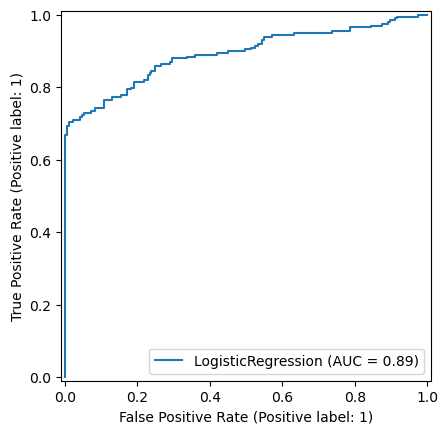

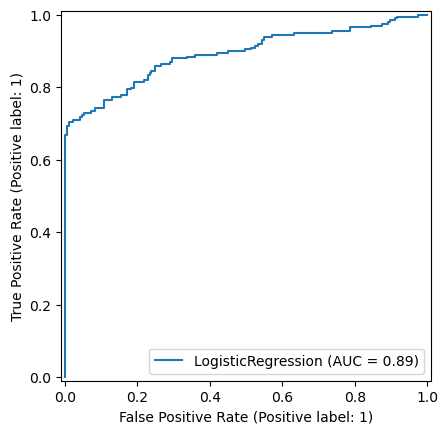

In [ ]:
# 1. Logistic Regression (GridSearchCV)

param_grid_logreg = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}
grid_logreg = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_logreg, cv=5, scoring='accuracy')
grid_logreg.fit(X_train, y_train)

best_logreg = grid_logreg.best_estimator_
y_pred_logreg = best_logreg.predict(X_test)
y_prob_logreg = best_logreg.predict_proba(X_test)[:, 1]

print("Best Logistic Regression:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_logreg):.3f}")
print(f"Precision: {precision_score(y_test, y_pred_logreg):.3f}")
print(f"F1 Score: {f1_score(y_test, y_pred_logreg):.3f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_prob_logreg):.3f}")
RocCurveDisplay.from_estimator(best_logreg, X_test, y_test).plot()


Best Decision Tree:
Accuracy: 0.901
Precision: 1.000
F1 Score: 0.891
ROC AUC: 0.908


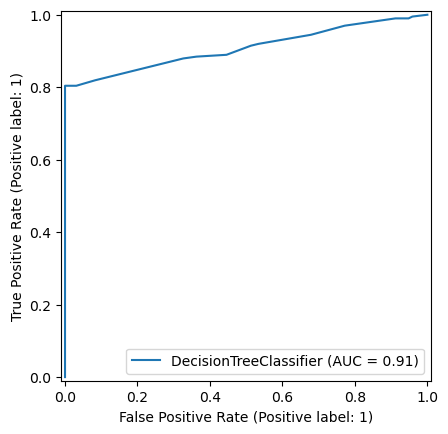

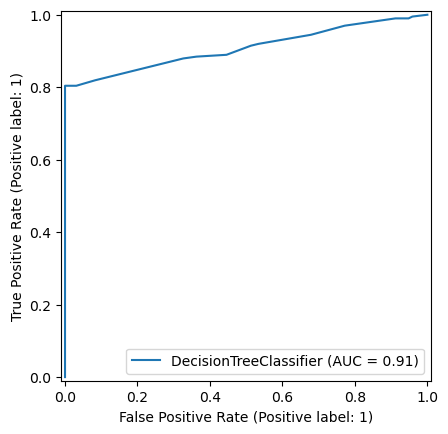

In [ ]:
# 2. Decision Tree (GridSearchCV)

param_grid_tree = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10]
}
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid_tree, cv=5, scoring='accuracy')
grid_tree.fit(X_train, y_train)

best_tree = grid_tree.best_estimator_
y_pred_tree = best_tree.predict(X_test)
y_prob_tree = best_tree.predict_proba(X_test)[:, 1]

print("Best Decision Tree:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_tree):.3f}")
print(f"Precision: {precision_score(y_test, y_pred_tree):.3f}")
print(f"F1 Score: {f1_score(y_test, y_pred_tree):.3f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_prob_tree):.3f}")
RocCurveDisplay.from_estimator(best_tree, X_test, y_test).plot()

Best Random Forest:
Accuracy: 0.834
Precision: 0.929
F1 Score: 0.817
ROC AUC: 0.877


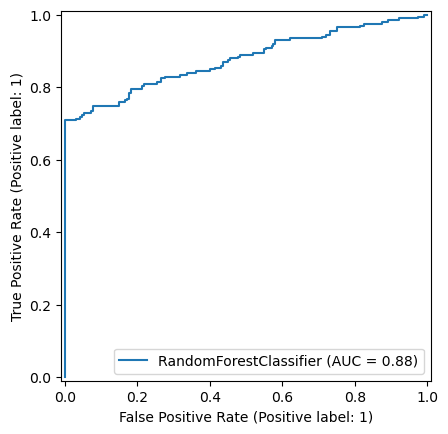

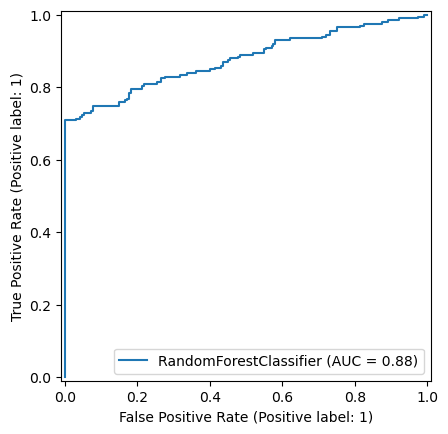

In [ ]:
#3. Random Forest (GridSearchCV)

param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5]
}
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)

best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)
y_prob_rf = best_rf.predict_proba(X_test)[:, 1]

print("Best Random Forest:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.3f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.3f}")
print(f"F1 Score: {f1_score(y_test, y_pred_rf):.3f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_prob_rf):.3f}")
RocCurveDisplay.from_estimator(best_rf, X_test, y_test).plot()


Best SVC:
Accuracy: 0.842
Precision: 0.966
F1 Score: 0.821
ROC AUC: 0.890


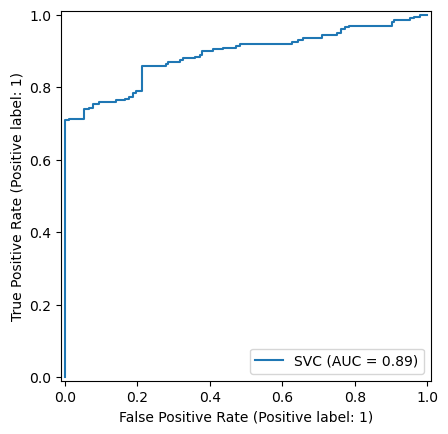

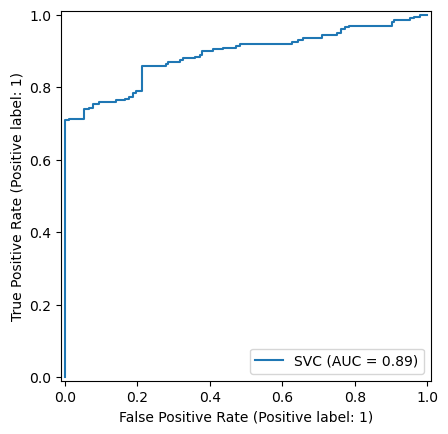

In [ ]:
# 4. Support Vector Classifier (GridSearchCV)

param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}
grid_svc = GridSearchCV(SVC(probability=True), param_grid_svc, cv=5, scoring='accuracy')
grid_svc.fit(X_train, y_train)

best_svc = grid_svc.best_estimator_
y_pred_svc = best_svc.predict(X_test)
y_prob_svc = best_svc.predict_proba(X_test)[:, 1]

print("Best SVC:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svc):.3f}")
print(f"Precision: {precision_score(y_test, y_pred_svc):.3f}")
print(f"F1 Score: {f1_score(y_test, y_pred_svc):.3f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_prob_svc):.3f}")
RocCurveDisplay.from_estimator(best_svc, X_test, y_test).plot()


In [ ]:
# Create a summary dictionary
results = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVC'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_log),
        accuracy_score(y_test, y_pred_tree),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_svc)
    ],
    'Precision': [
        precision_score(y_test, y_pred_log),
        precision_score(y_test, y_pred_tree),
        precision_score(y_test, y_pred_rf),
        precision_score(y_test, y_pred_svc)
    ],
    'Recall': [
        recall_score(y_test, y_pred_log),
        recall_score(y_test, y_pred_tree),
        recall_score(y_test, y_pred_rf),
        recall_score(y_test, y_pred_svc)
    ],
    'F1 Score': [
        f1_score(y_test, y_pred_log),
        f1_score(y_test, y_pred_tree),
        f1_score(y_test, y_pred_rf),
        f1_score(y_test, y_pred_svc)
    ],
    'ROC AUC': [
        roc_auc_score(y_test, y_prob_log),
        roc_auc_score(y_test, y_prob_tree),
        roc_auc_score(y_test, y_prob_rf),
        roc_auc_score(y_test, y_prob_svc)
    ]
}

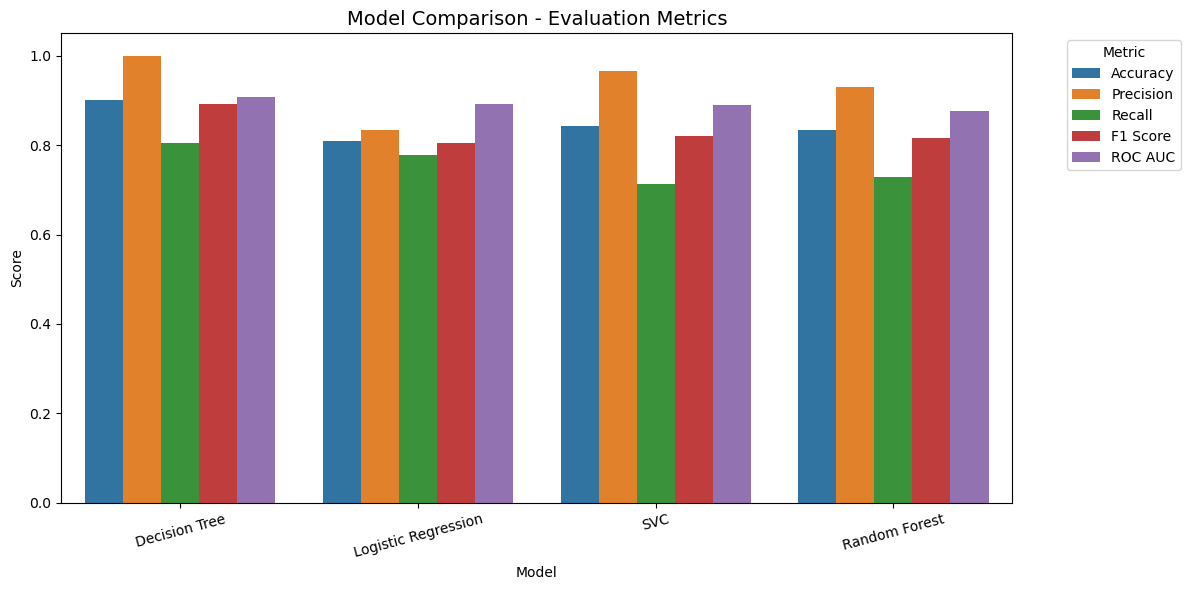

In [ ]:
# Convert to DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='ROC AUC', ascending=False)
results_df.reset_index(drop=True, inplace=True)

# Display table
results_df.style.set_caption("Model Comparison - Evaluation Metrics").format("{:.3f}")

plt.figure(figsize=(12, 6))
sns.barplot(
    data=results_df.melt(id_vars='Model', var_name='Metric', value_name='Score'),
    x='Model', y='Score', hue='Metric'
)
plt.title("Model Comparison - Evaluation Metrics", fontsize=14)
plt.ylabel("Score")
plt.xticks(rotation=15)
plt.legend(title="Metric", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# **Conclusion**

This analysis aimed to develop a machine learning model to predict osteoporosis risk, supporting early detection, personalized care, and optimized resource allocation in healthcare. The exploration of the osteoporosis dataset (1,958 entries, 16 features) revealed a balanced *target variable* (50% osteoporosis prevalence), significant missing values in *Alcohol Consumption* (50.4%), *Medical Conditions* (33.0%), and *Medications* (50.3%), and key features such as age (mean 39, range 18–90) and lifestyle factors. While preprocessing and feature engineering were not fully implemented, the focus remained on evaluating model performance.

1. Pre-Tuning Performance:

    - Logistic Regression achieved an Accuracy of 0.809, Precision of 0.833, Recall of 0.779, F1 Score of 0.805, and ROC AUC of 0.892.
    - Decision Tree Classifier scored an Accuracy of 0.824, Precision of 0.819, Recall of 0.839, F1 Score of 0.829, and ROC AUC of 0.824.
    -Random Forest Classifier recorded an Accuracy of 0.849, Precision of 0.955, Recall of 0.739, F1 Score of 0.833, and ROC AUC of 0.887.
    - Support Vector Classifier (SVC) achieved an Accuracy of 0.842, Precision of 0.966, Recall of 0.714, F1 Score of 0.821, and ROC AUC of 0.890.

2. Post-Tuning Performance:

    - Logistic Regression remained stable with an Accuracy of 0.809, Precision of 0.833, F1 Score of 0.805, and ROC AUC of 0.892.
    - Decision Tree improved significantly, reaching an Accuracy of 0.901, Precision of 1.000, F1 Score of 0.891, and ROC AUC of 0.908.
     - Random Forest slightly adjusted to an Accuracy of 0.834, Precision of 0.929, F1 Score of 0.817, and ROC AUC of 0.877.
    - SVC maintained its performance with an Accuracy of 0.842, Precision of 0.966, F1 Score of 0.821, and ROC AUC of 0.890.

**The tuned decision tree model, with its superior performance, offers significant potential to empower healthcare providers with early intervention strategies, personalised treatment plans, and reduced fracture incidence, aligning with the project’s objectives.**